In [35]:
from keras.datasets import fashion_mnist

In [36]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [38]:
trainX = trainX.reshape(60000, 28, 28, 1)
testX = testX.reshape(10000, 28, 28, 1)

In [39]:
from keras.utils import np_utils

In [40]:
trainY = np_utils.to_categorical(trainY, 10)  #one-hot encoding, 變成使用0,1,00格式呈現
testY = np_utils.to_categorical(testY, 10)

In [41]:
trainX = trainX/255
testX = testX/255

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD, Adadelta, Adam

In [67]:
model = Sequential()

In [68]:
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [69]:
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [70]:
model.add(MaxPool2D(pool_size=(2,2)))

In [71]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [72]:
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1), activation='relu'))

In [73]:
model.add(MaxPool2D(pool_size=(2,2)))

In [76]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))

In [77]:
model.add(Dense(256, activation='relu'))

In [78]:
model.add(Dense(10, activation='softmax'))

In [79]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)             

In [82]:
model.fit(trainX, trainY, batch_size=100, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 55s 916us/step - loss: 0.4894 - accuracy: 0.8220
Epoch 2/10
60000/60000 [==============================] - 55s 923us/step - loss: 0.2912 - accuracy: 0.8927
Epoch 3/10
60000/60000 [==============================] - 55s 923us/step - loss: 0.2400 - accuracy: 0.9116
Epoch 4/10
60000/60000 [==============================] - 55s 924us/step - loss: 0.2105 - accuracy: 0.9208
Epoch 5/10
60000/60000 [==============================] - 59s 982us/step - loss: 0.1870 - accuracy: 0.9301
Epoch 6/10
60000/60000 [==============================] - 57s 945us/step - loss: 0.1651 - accuracy: 0.9376
Epoch 7/10
60000/60000 [==============================] - 59s 976us/step - loss: 0.1465 - accuracy: 0.9446
Epoch 8/10
60000/60000 [==============================] - 57s 950us/step - loss: 0.1305 - accuracy: 0.9513
Epoch 9/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1141 - accuracy: 0.9568
Epoch 10/10
60000/60000 [==============

In [83]:
score = model.evaluate(testX, testY)

10000/10000 [==============================] - 2s 237us/step


In [94]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]:.5f}')

測試資料的 loss: 0.29814
測試資料的正確率: 0.91470


In [85]:
model.save("CNNmodel_fashion")

In [86]:
del model

In [87]:
from keras.models import load_model

In [88]:
model = load_model('CNNmodel_fashion')

In [89]:
predict = model.predict_classes(testX)

In [90]:
labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

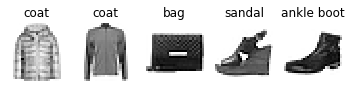

In [92]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(testX[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(labelNames[predict[pick[i]]])
    plt.axis("off")